Import Libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


Load Data

In [3]:
house = pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Drop Irrelevant columns and Map Categorical Variabes

In [5]:
# Drop ID column
house.drop('Id', axis=1, inplace=True)


# map  category to  numerical values 
house['OverallQual'] = house['OverallQual'].map({10:'Very Excellent', 9:'Excellent', 8:'Very Good',7: 'Good',6: 'Above Average', 5:'Average', 4:'Below Average',3: 'Fair',2: 'Poor',1: 'Very Poor'})
house['OverallCond'] = house['OverallCond'].map({10:'Very Excellent', 9:'Excellent', 8:'Very Good',7: 'Good',6: 'Above Average', 5:'Average', 4:'Below Average',3: 'Fair',2: 'Poor',1: 'Very Poor'})

# MSSubClass: Identifies the type of dwelling involved in the sale.	

house['MSSubClass'] = house['MSSubClass'].map({    20: "1-STORY 1946 & NEWER ALL STYLES",    30: "1-STORY 1945 & OLDER",    40: "1-STORY W/FINISHED ATTIC ALL AGES",    45: "1-1/2 STORY - UNFINISHED ALL AGES",
    50: "1-1/2 STORY FINISHED ALL AGES",    60: "2-STORY 1946 & NEWER",    70: "2-STORY 1945 & OLDER",    75: "2-1/2 STORY ALL AGES",    80: "SPLIT OR MULTI-LEVEL",    85: "SPLIT FOYER",    90: "DUPLEX - ALL STYLES AND AGES",
    120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",    150: "1-1/2 STORY PUD - ALL AGES",    160: "2-STORY PUD - 1946 & NEWER",    180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",    190: "2 FAMILY CONVERSION - ALL STYLES AND AGES"})

# Year , Month Sold, YearBuilt  , YearRemodAdd  as categorical
house['YrSold'] = house['YrSold'].astype(str)
house['MoSold'] = house['MoSold'].astype(str)
house['YearBuilt'] = house['YearBuilt'].astype(str)
house['YearRemodAdd'] = house['YearRemodAdd'].astype(str)





    


Handling Missing Values

In [6]:
# fill missing values with No
house['Alley'] = house['Alley'].fillna('No')
house['MasVnrType'] = house['MasVnrType'].fillna('No')
house['MasVnrArea'] = house['MasVnrArea'].fillna(0)
house['BsmtQual'] = house['BsmtQual'].fillna('No')
house['BsmtCond'] = house['BsmtCond'].fillna('No')
house['BsmtExposure'] = house['BsmtExposure'].fillna('No')
house['BsmtFinType1'] = house['BsmtFinType1'].fillna('No')
house['BsmtFinType2'] = house['BsmtFinType2'].fillna('No')
house['FireplaceQu'] = house['FireplaceQu'].fillna('No')
house['GarageType'] = house['GarageType'].fillna('No')
house['GarageFinish'] = house['GarageFinish'].fillna('No')
house['GarageQual'] = house['GarageQual'].fillna('No')
house['GarageCond'] = house['GarageCond'].fillna('No')
house['PoolQC'] = house['PoolQC'].fillna('No')
house['Fence'] = house['Fence'].fillna('No')
house['MiscFeature'] = house['MiscFeature'].fillna('No')

house.info()


# Remove columns with missing values
house = house.dropna(axis=1)

house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [7]:
house.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,8450,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,2,2008,WD,Normal,208500
1,1-STORY 1946 & NEWER ALL STYLES,RL,9600,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,...,0,No,No,No,0,5,2007,WD,Normal,181500
2,2-STORY 1946 & NEWER,RL,11250,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,9,2008,WD,Normal,223500
3,2-STORY 1945 & OLDER,RL,9550,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,...,0,No,No,No,0,2,2006,WD,Abnorml,140000
4,2-STORY 1946 & NEWER,RL,14260,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,...,0,No,No,No,0,12,2008,WD,Normal,250000


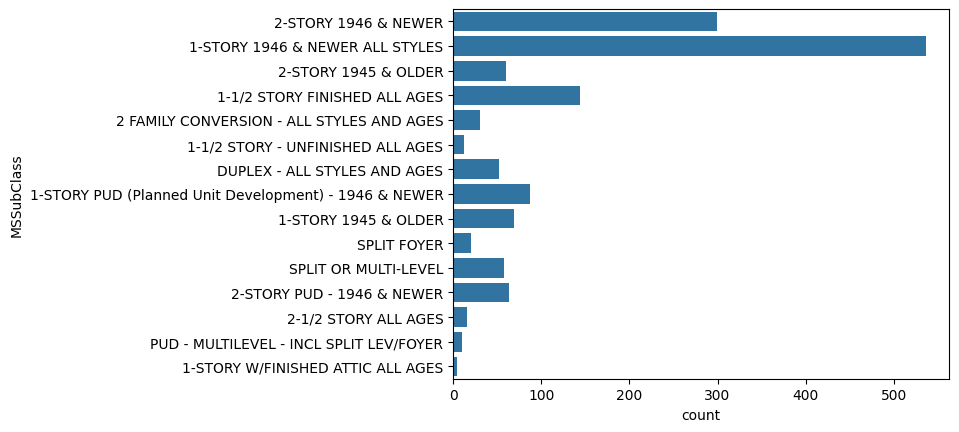

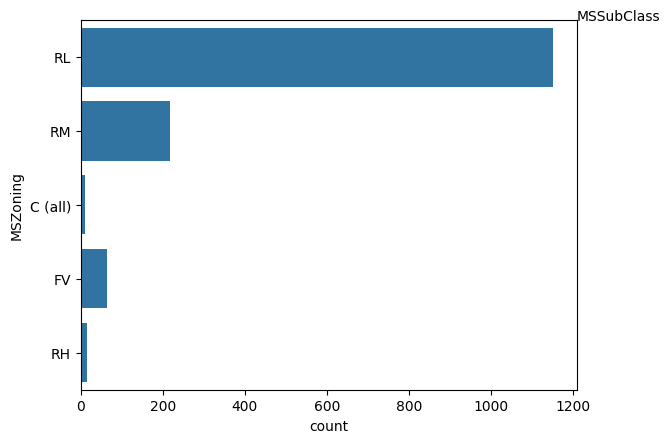

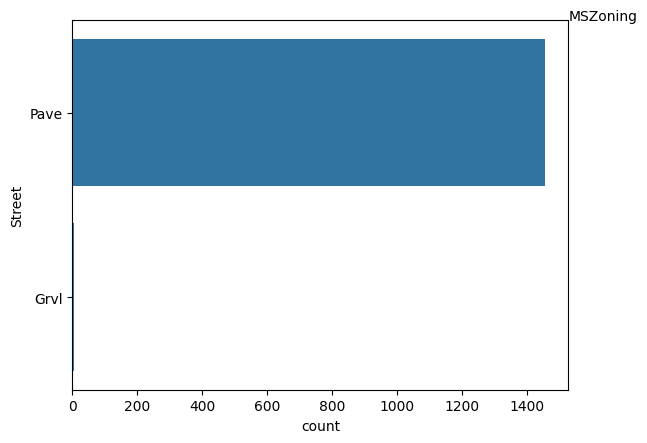

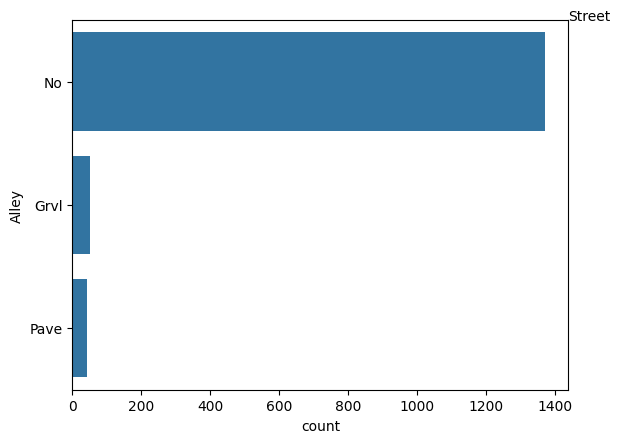

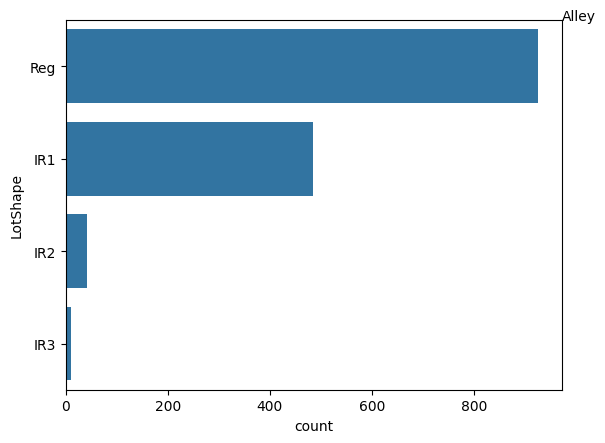

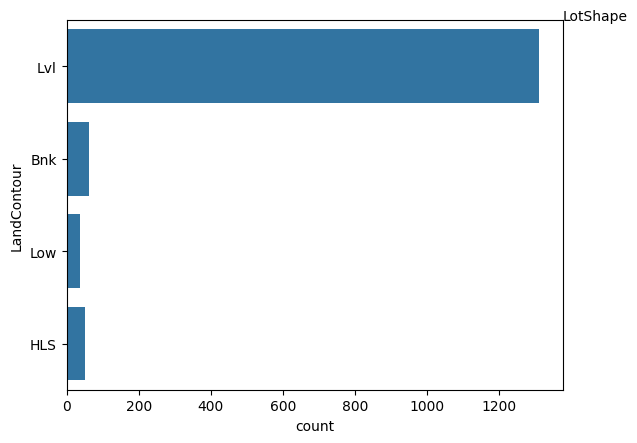

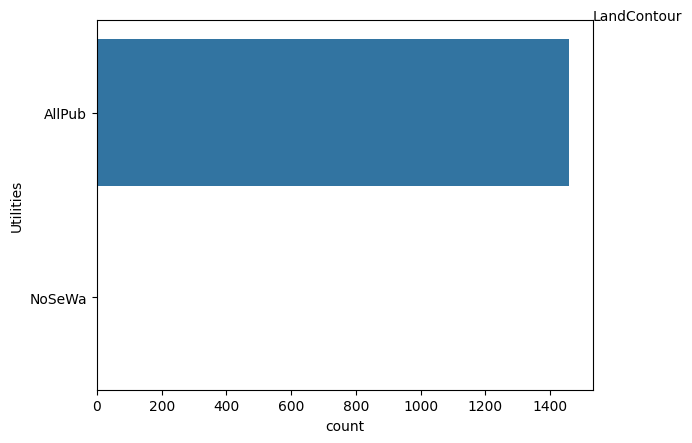

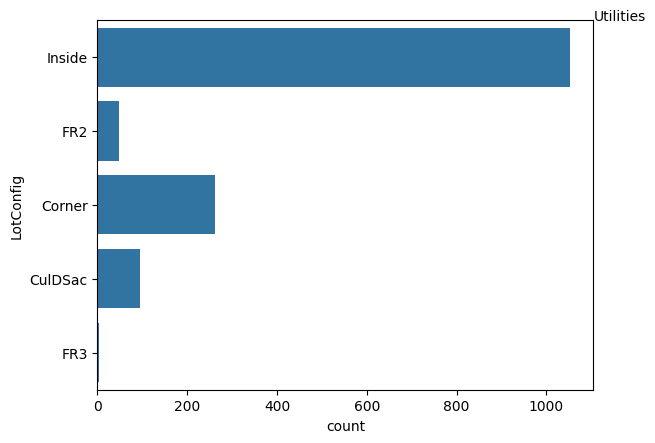

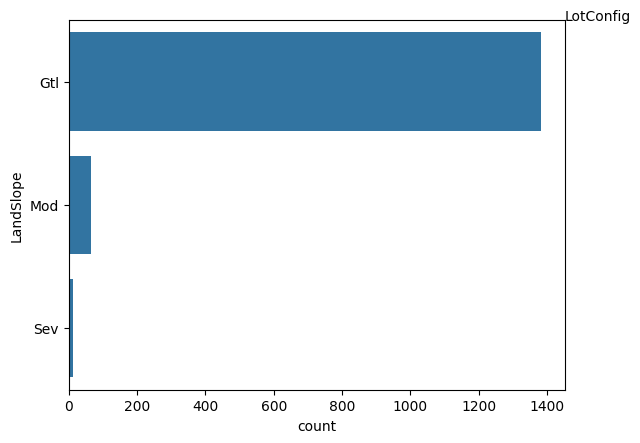

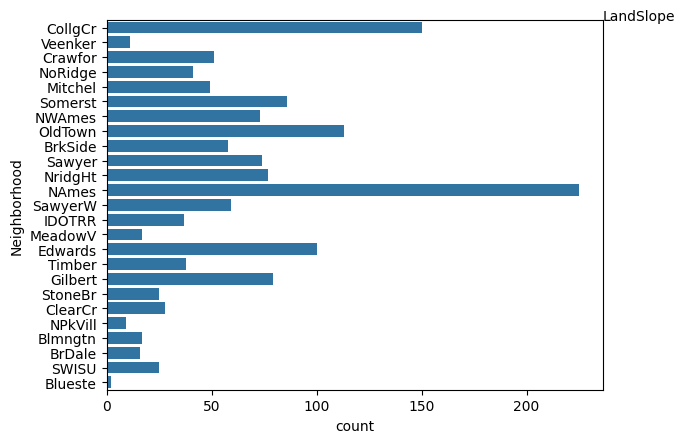

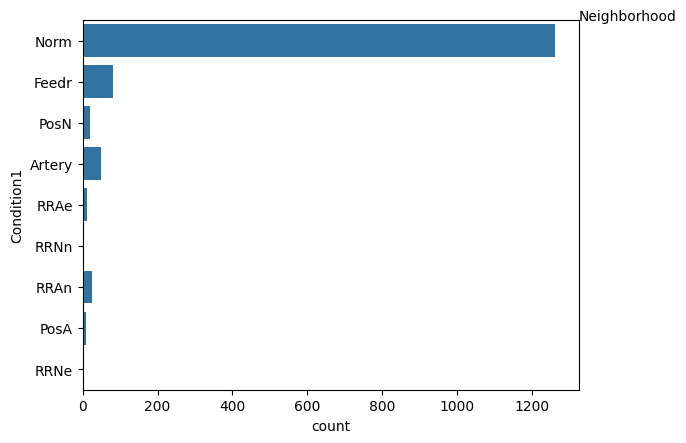

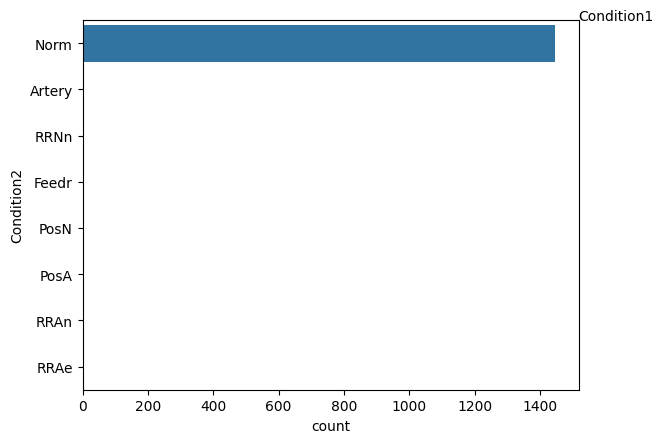

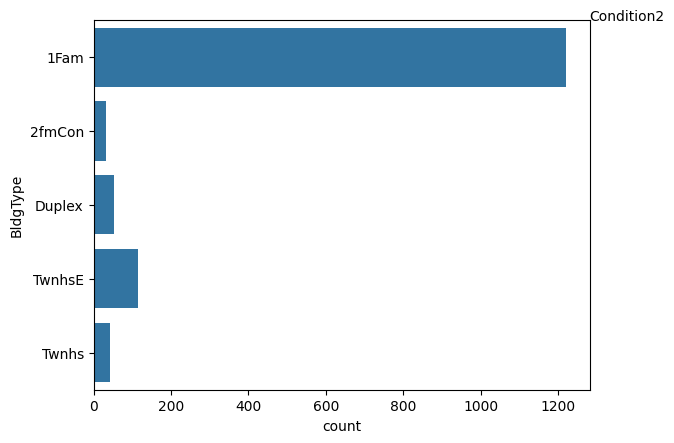

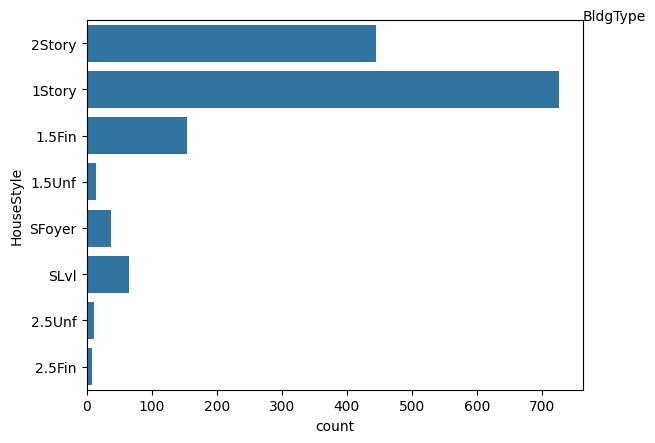

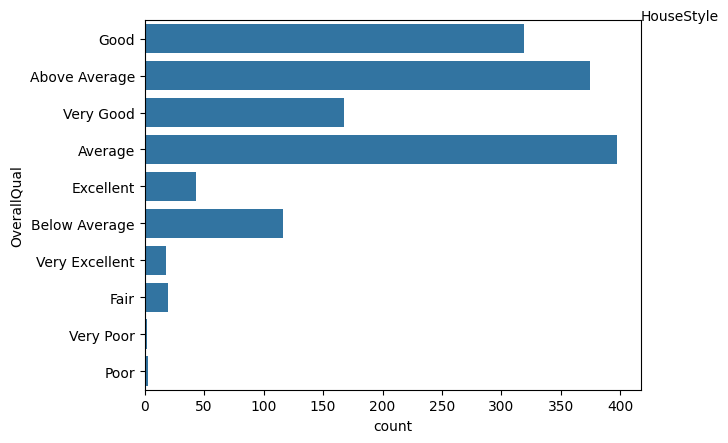

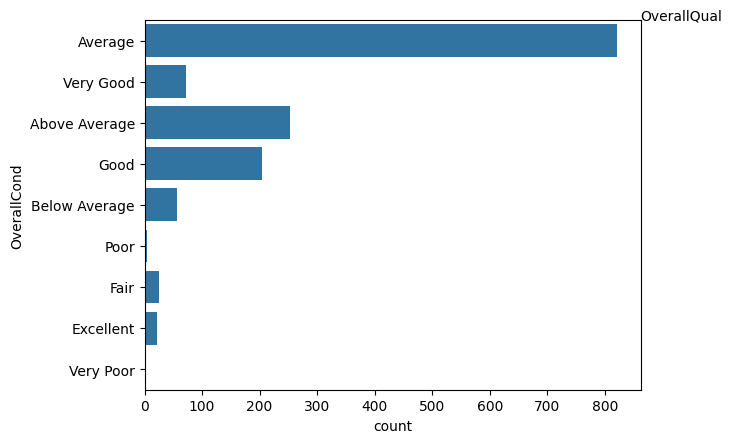

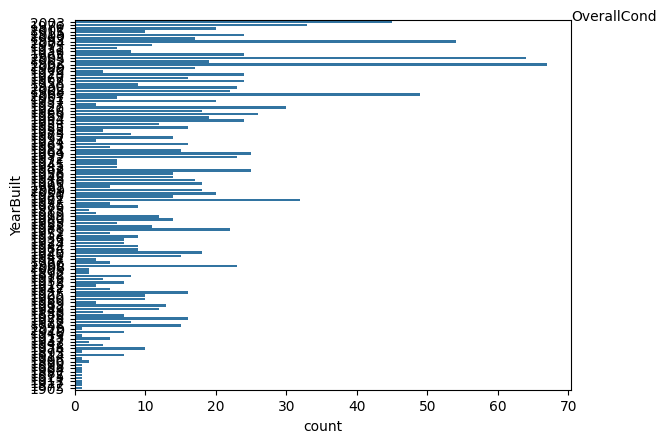

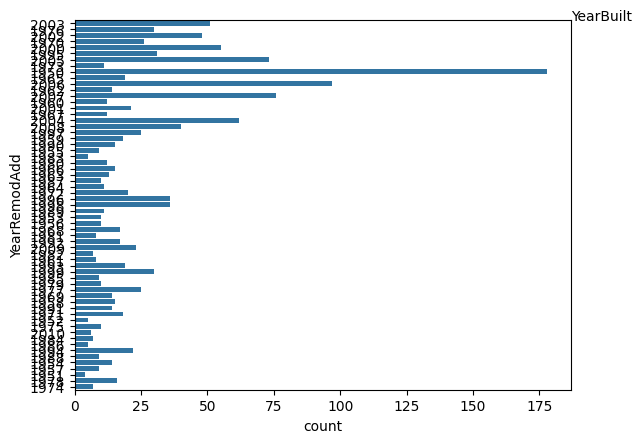

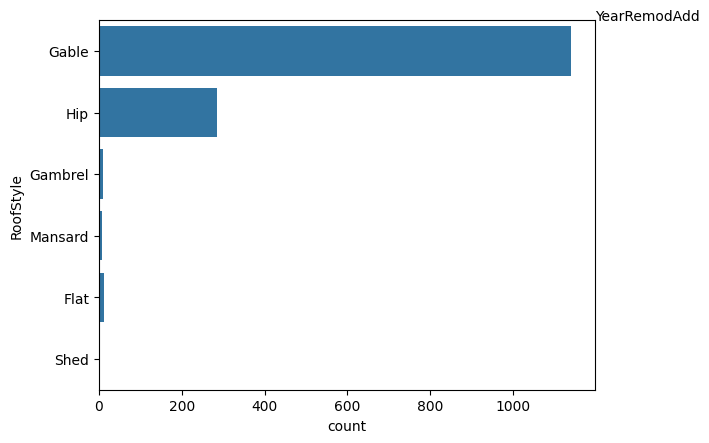

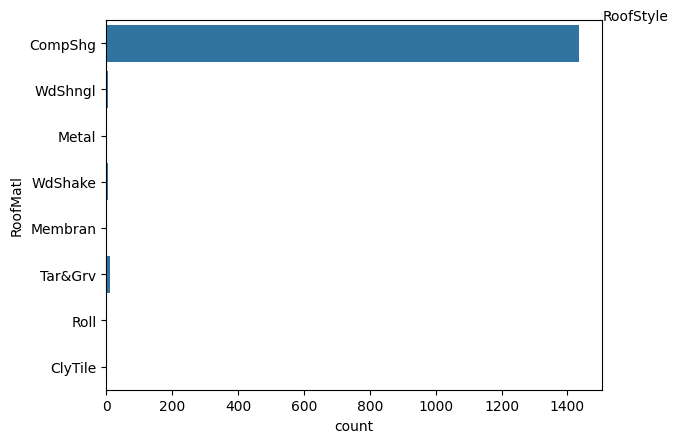

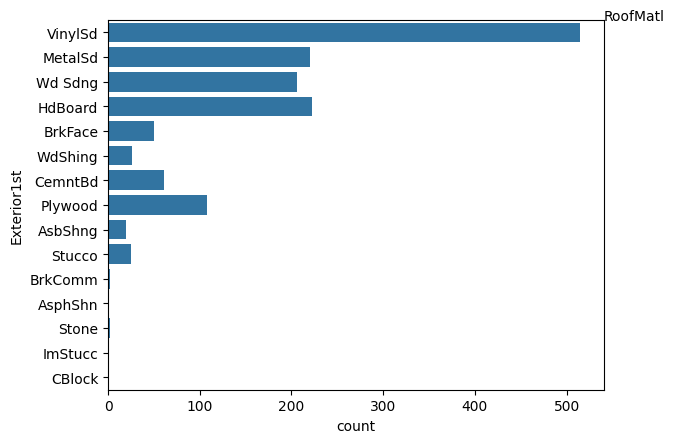

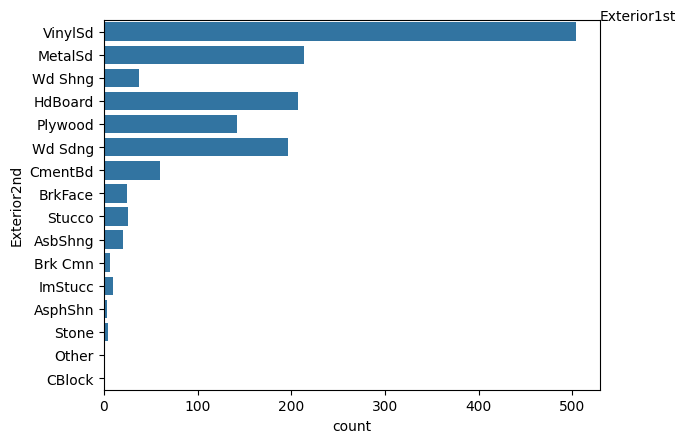

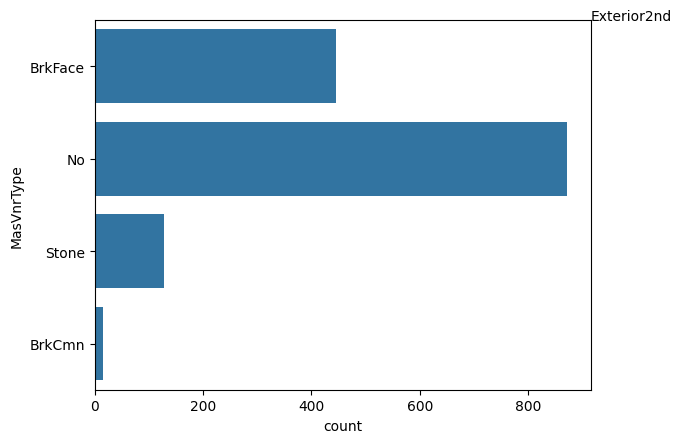

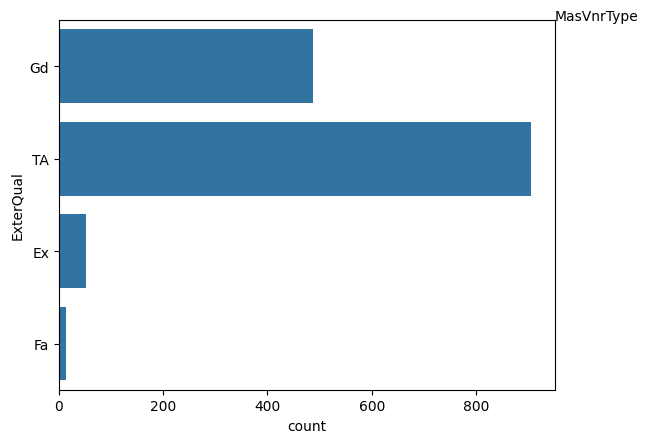

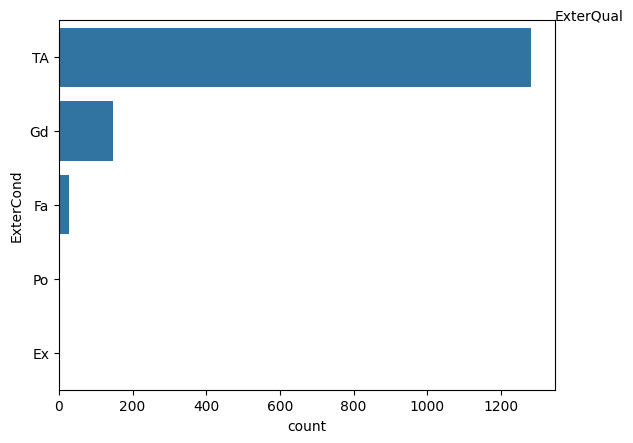

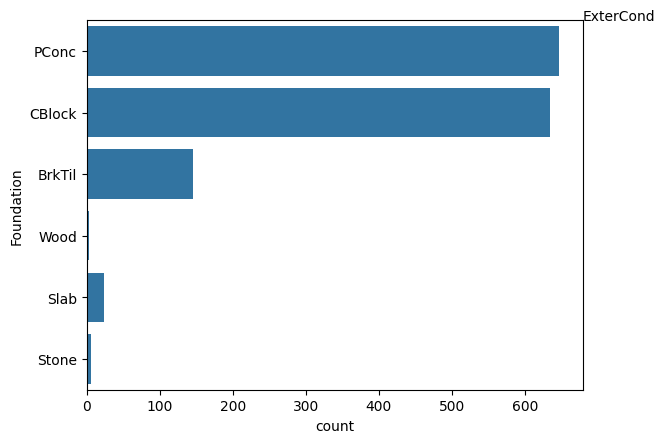

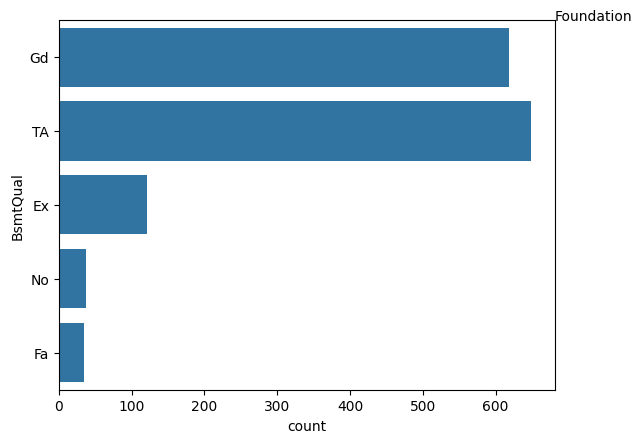

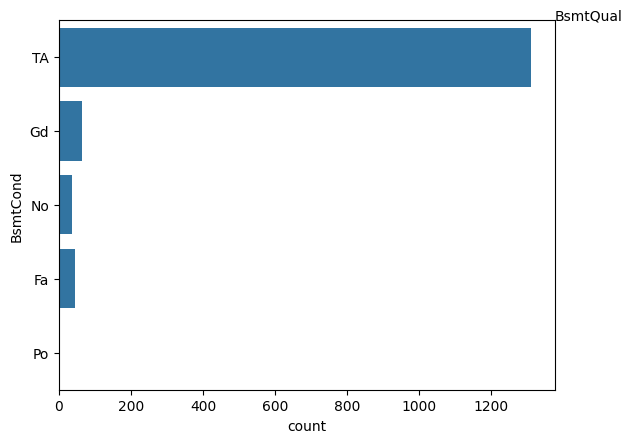

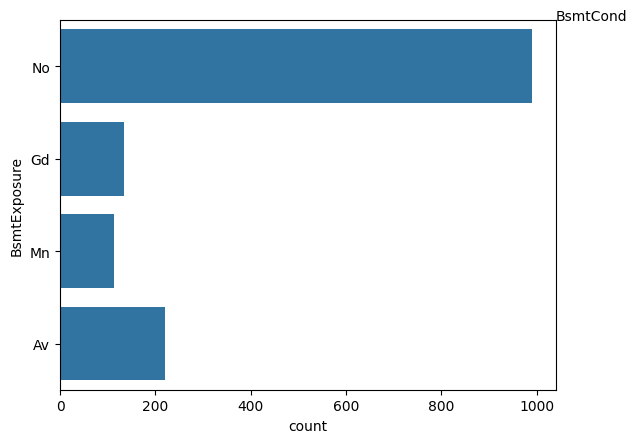

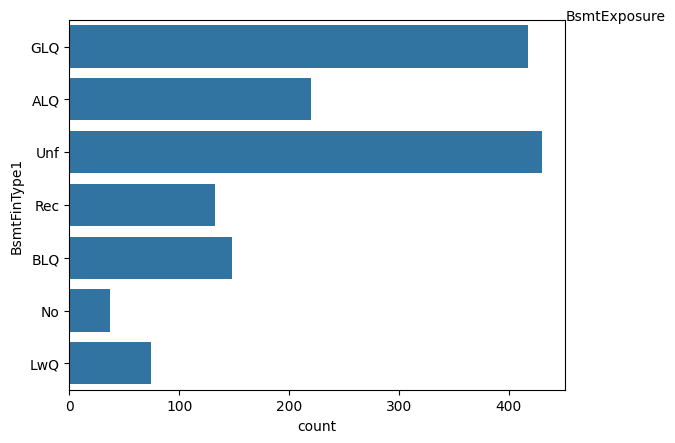

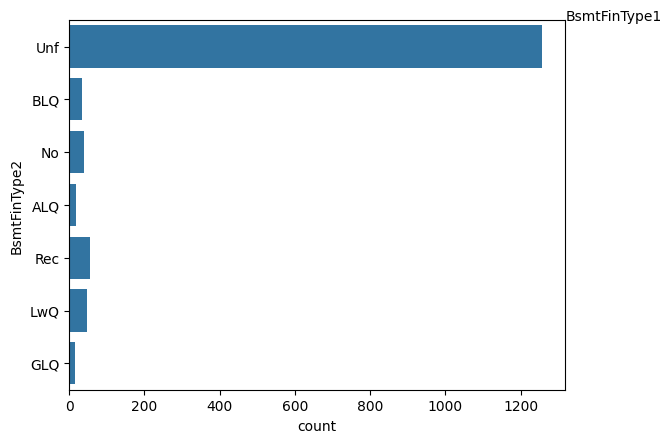

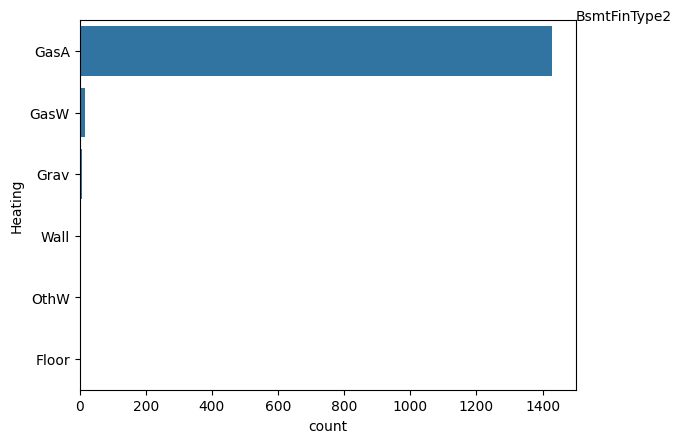

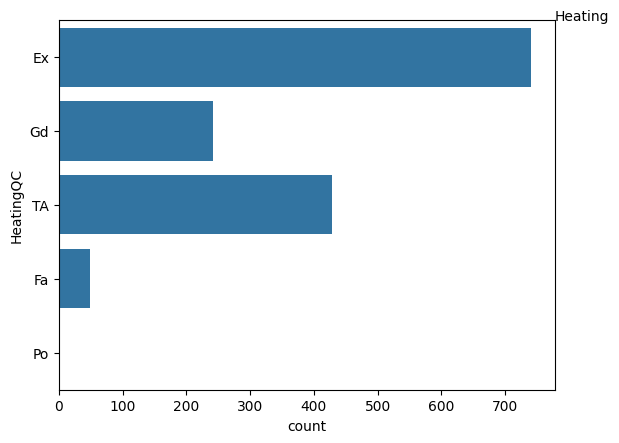

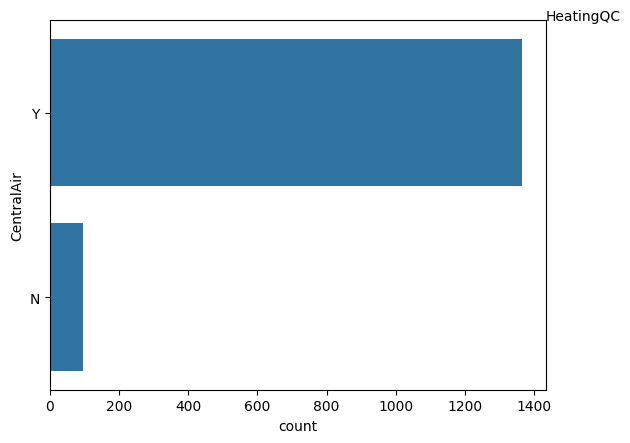

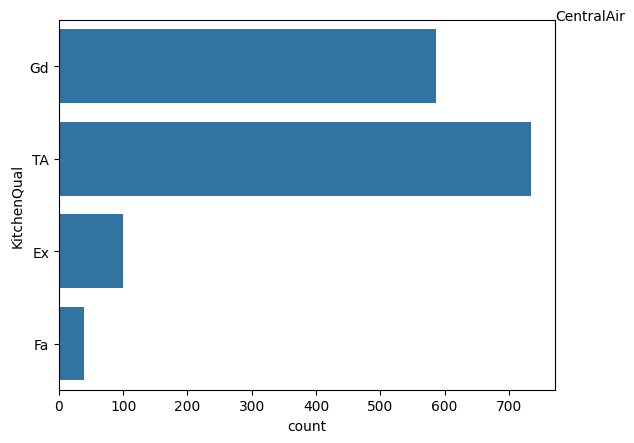

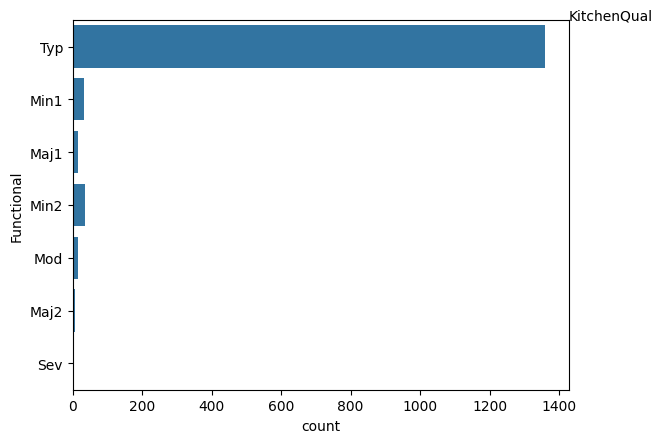

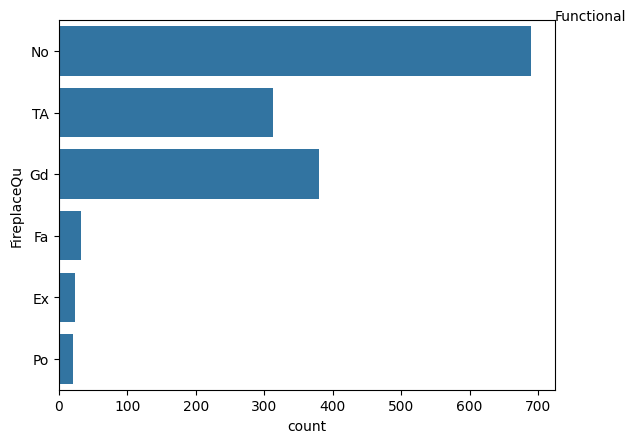

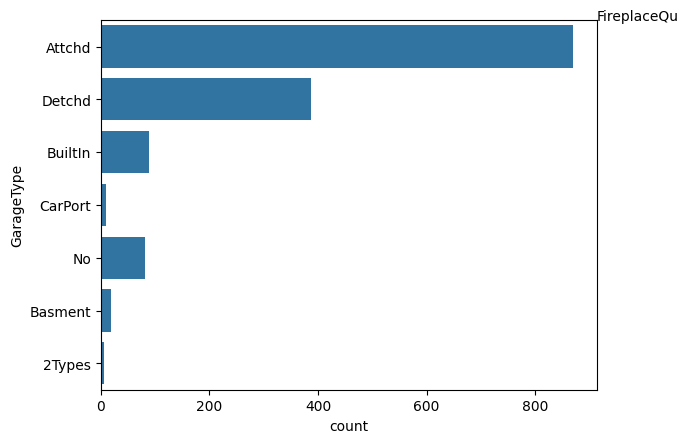

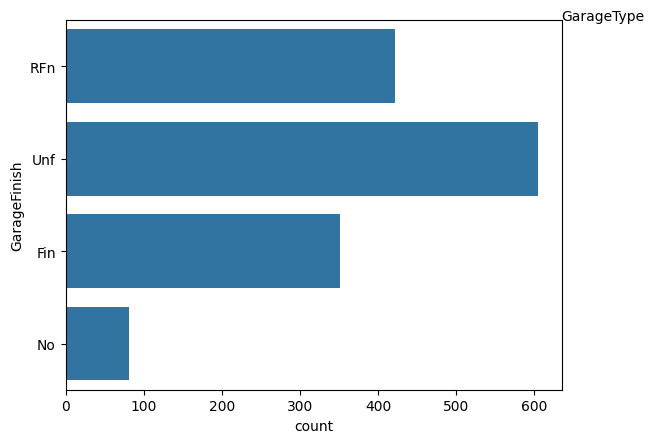

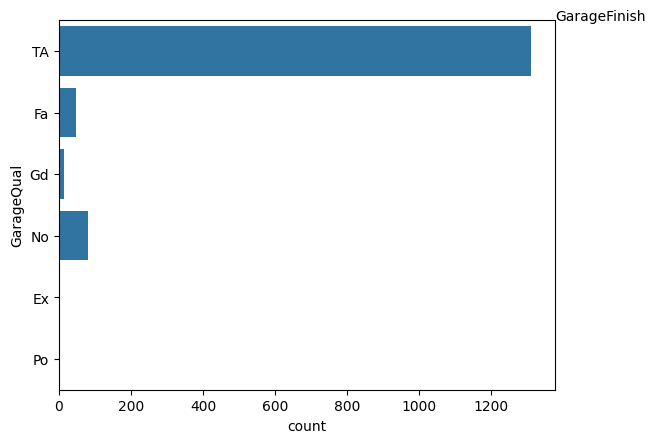

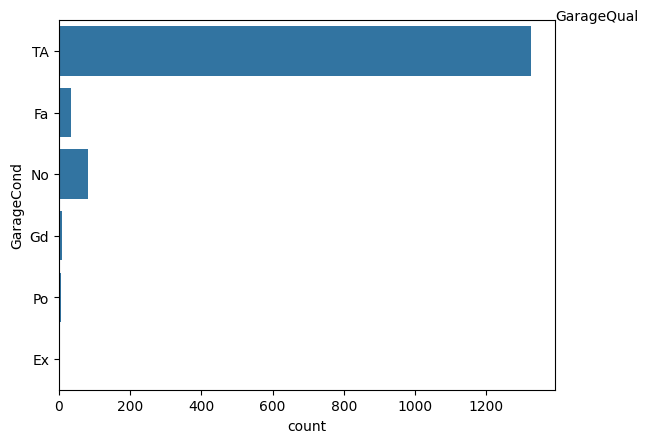

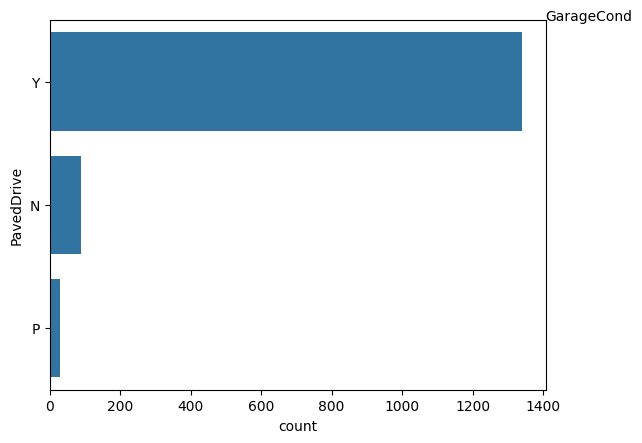

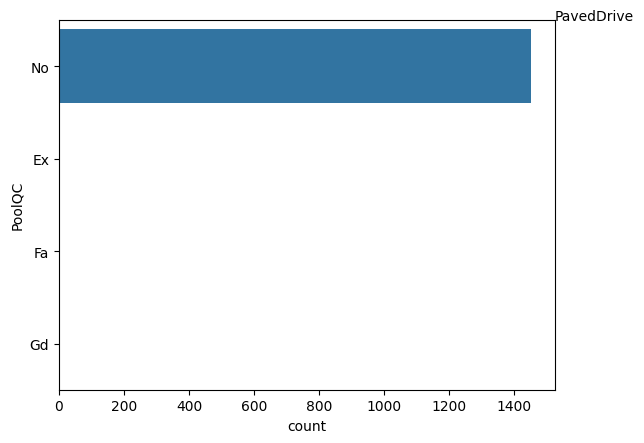

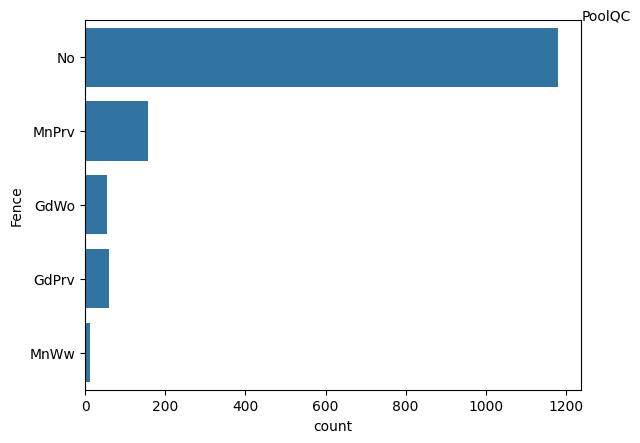

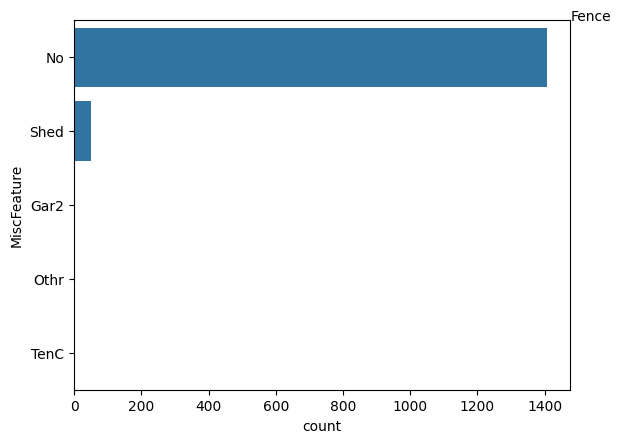

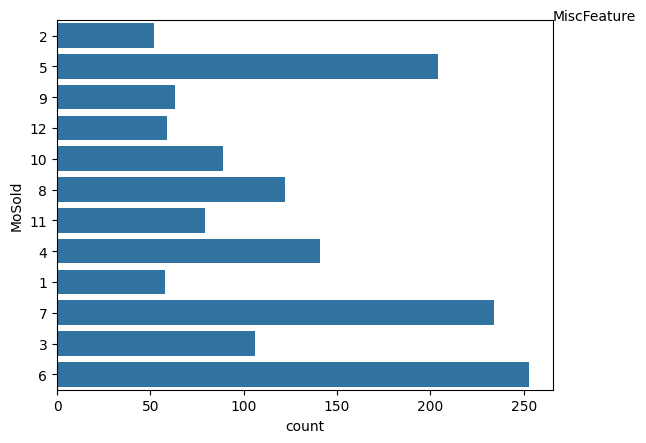

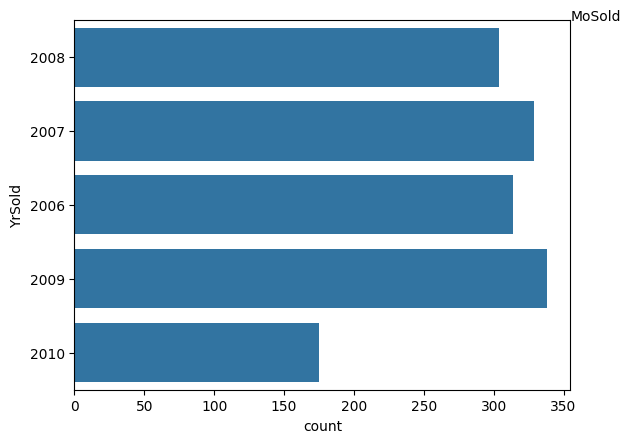

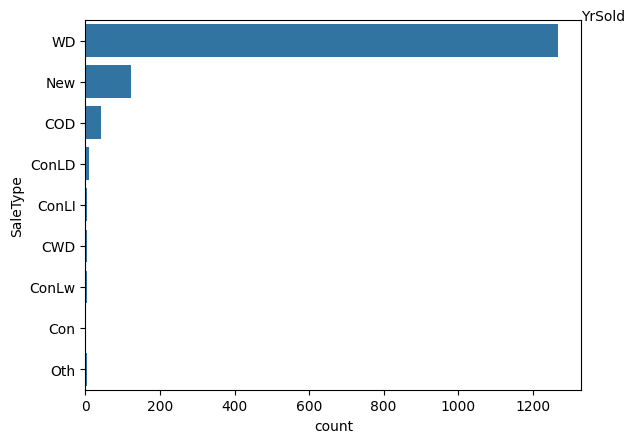

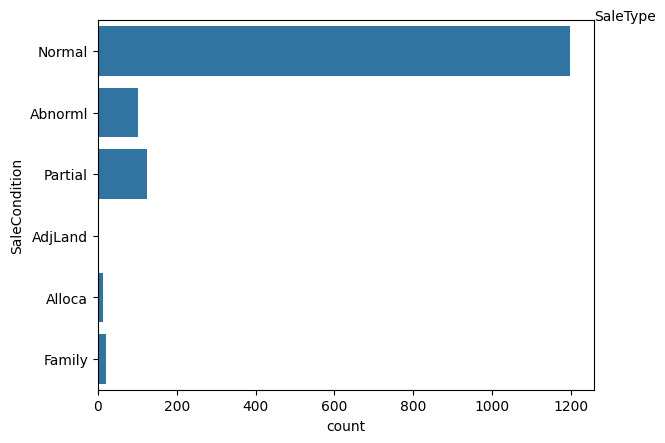

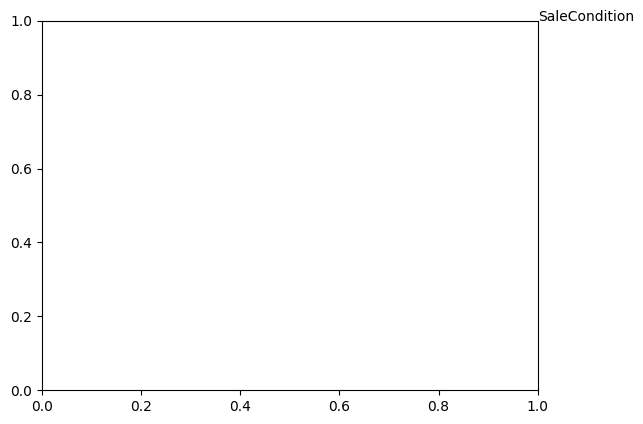

In [8]:
# Perform Exploratory Data Analysis loop all categorical columns create plots
import matplotlib.pyplot as plt
import seaborn as sns

for column in house.select_dtypes(include=['object']).columns:
    sns.countplot(y=column, data=house)
    plt.show()
    plt.annotate(column, xy=(1, 1), xytext=(0, 0), xycoords='axes fraction', textcoords='offset points')
    



In [9]:
# Remove unwanted categorical columns
house = house.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 'YearBuilt','YearRemodAdd' ], axis=1)


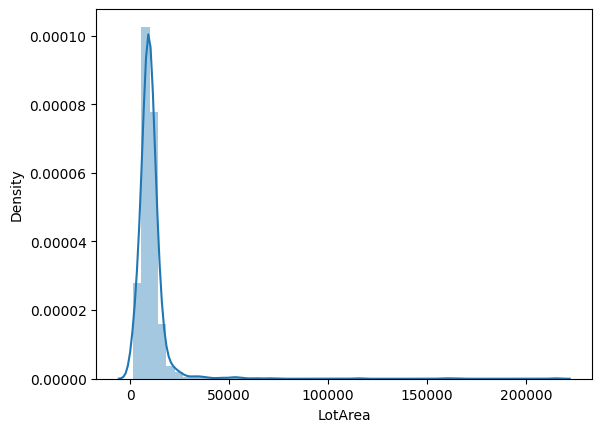

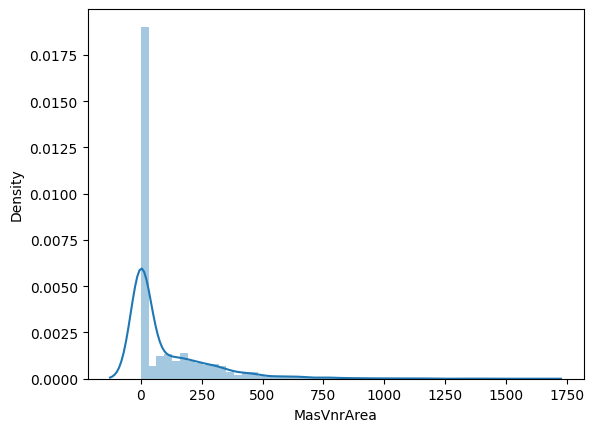

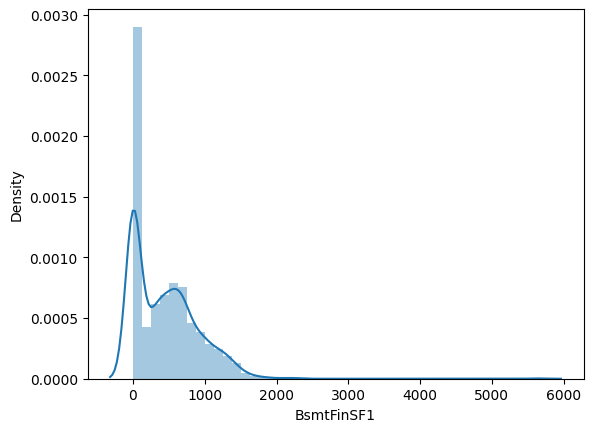

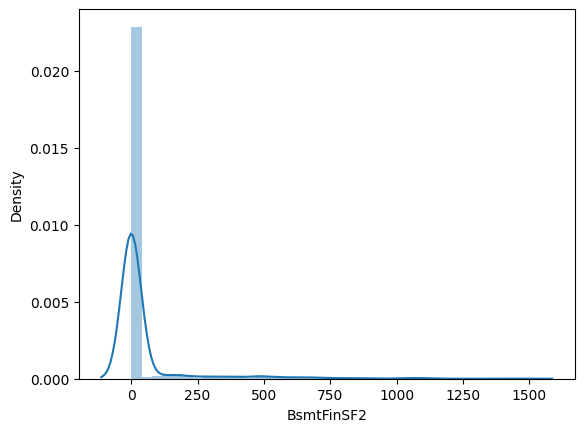

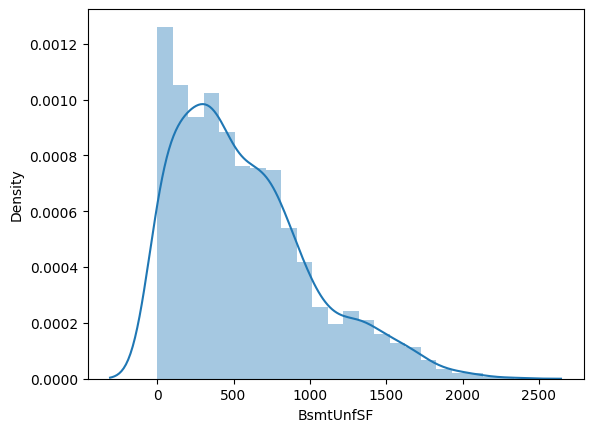

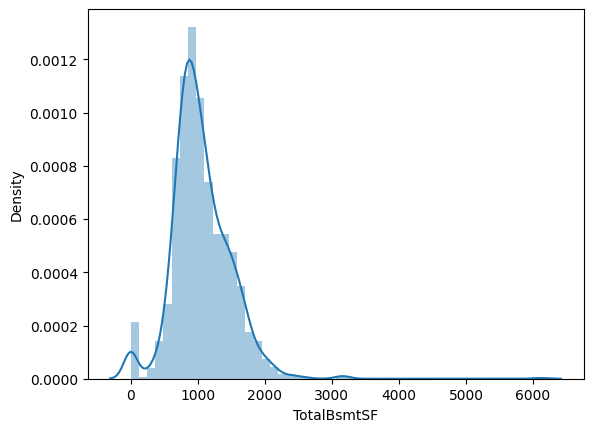

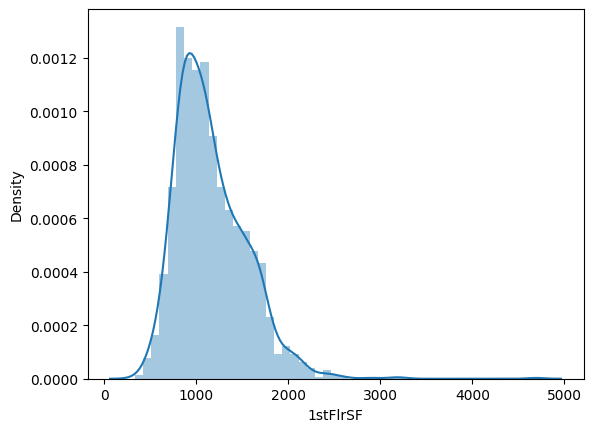

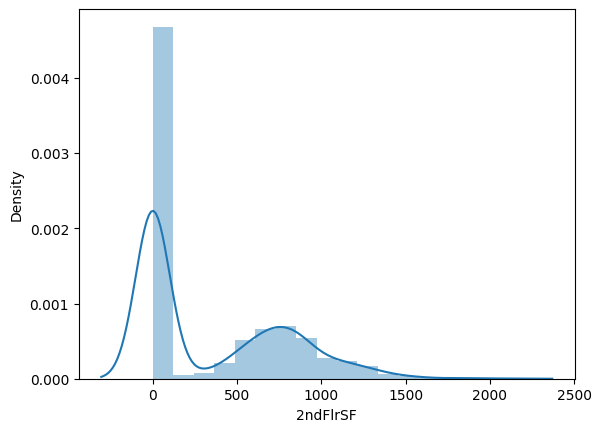

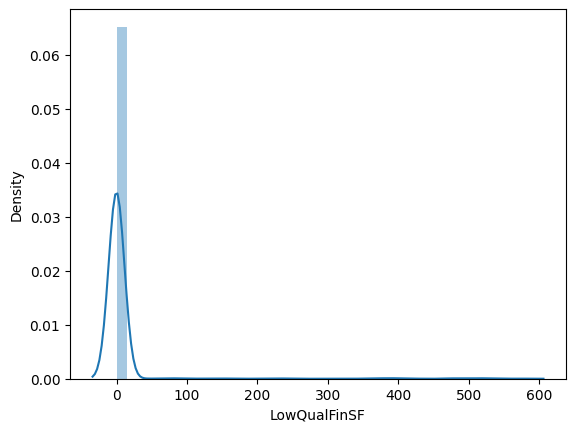

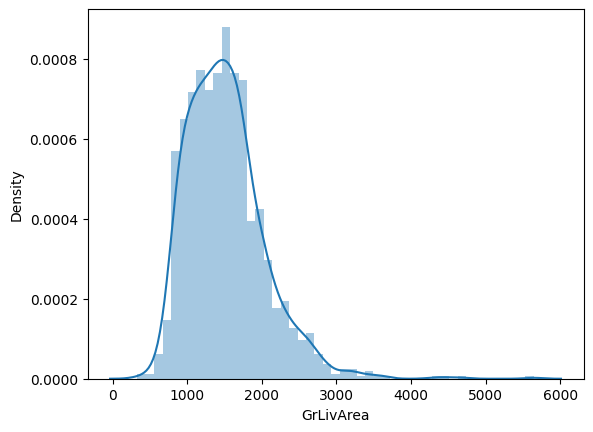

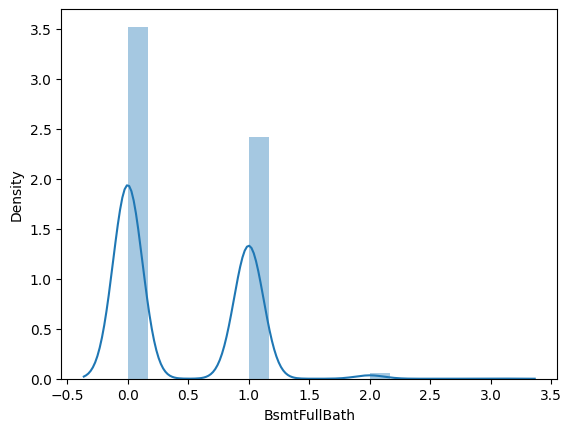

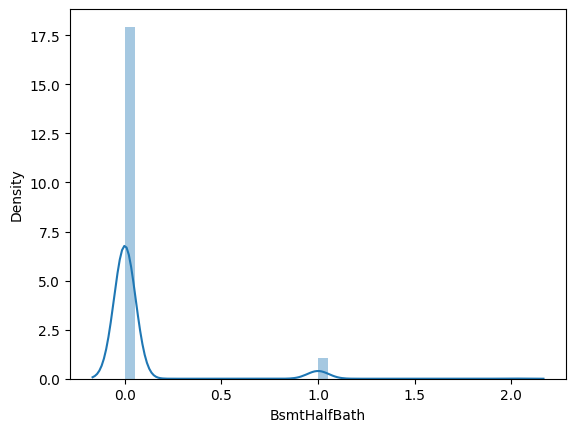

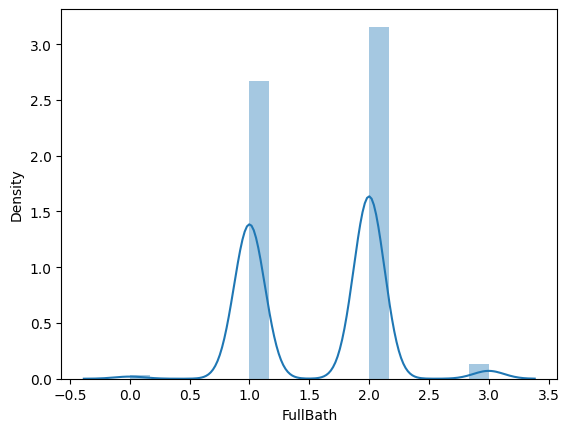

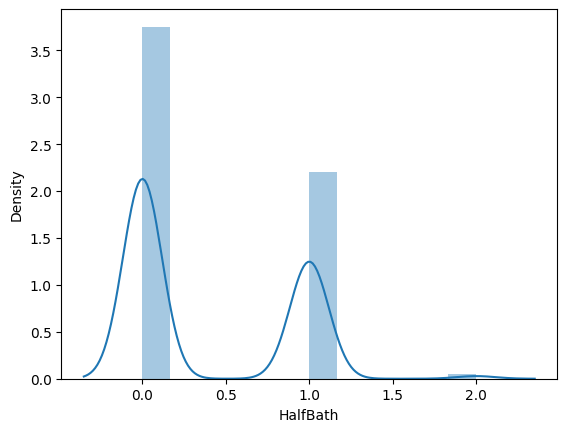

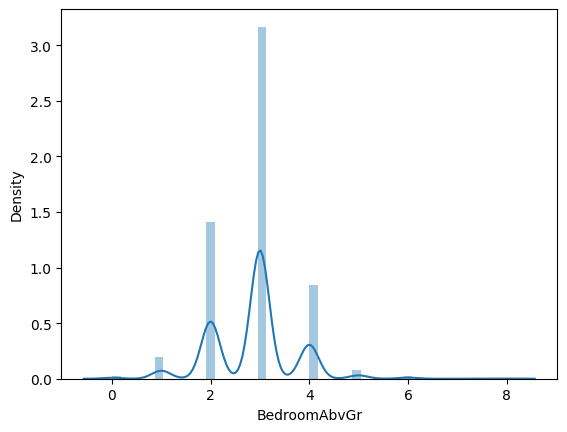

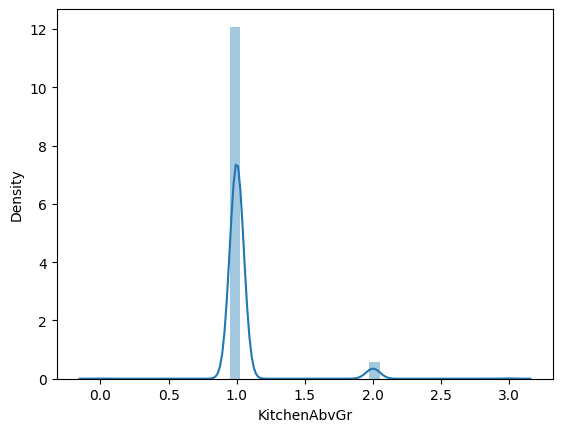

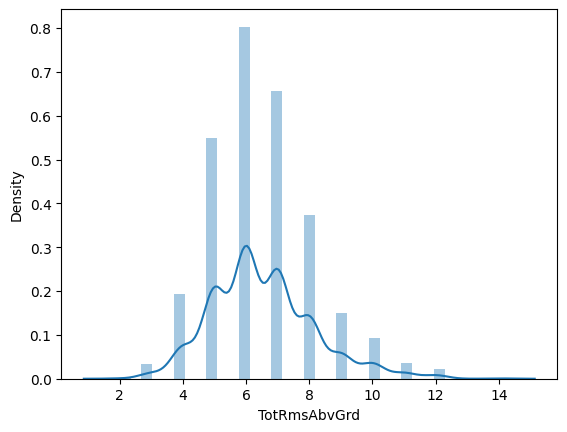

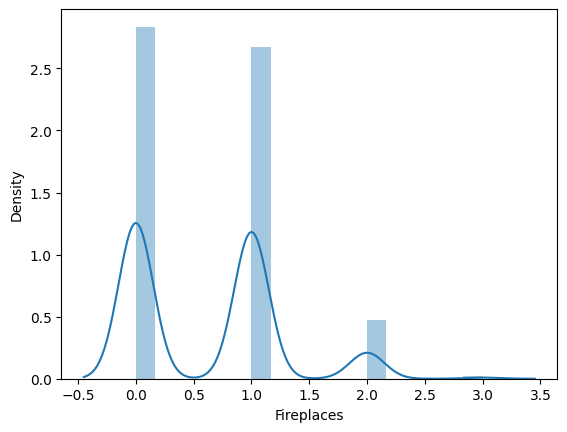

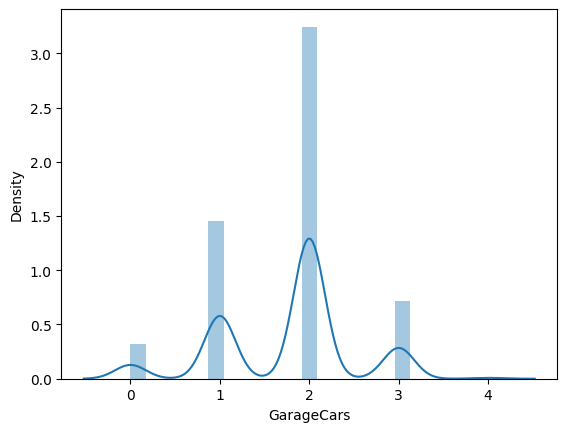

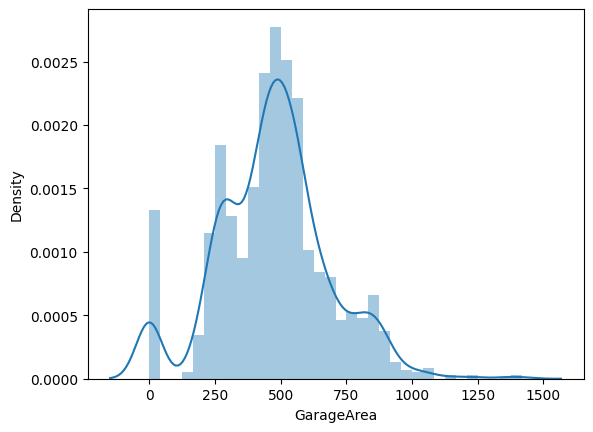

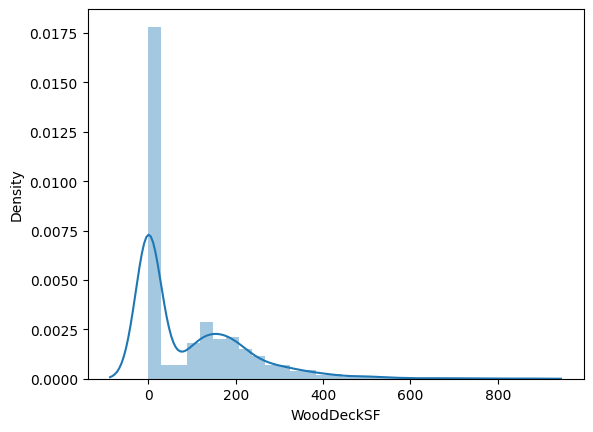

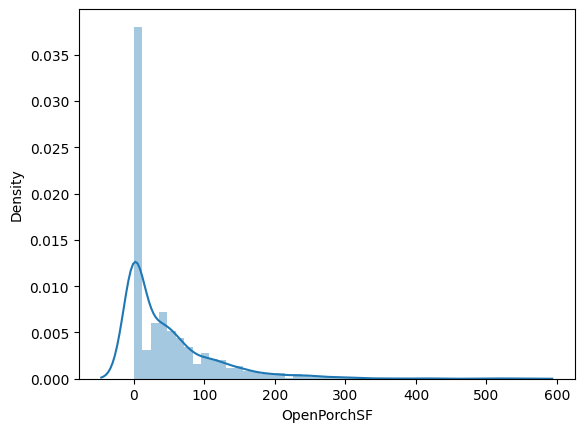

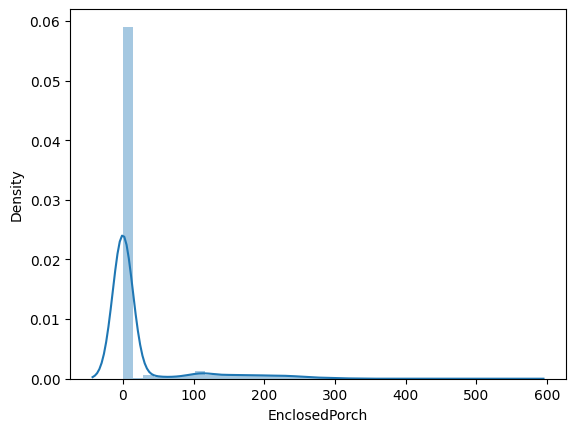

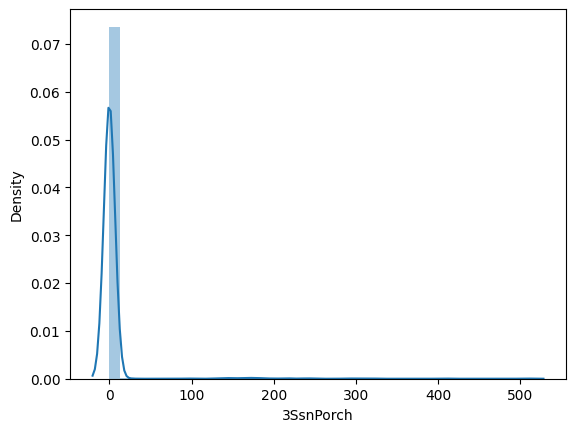

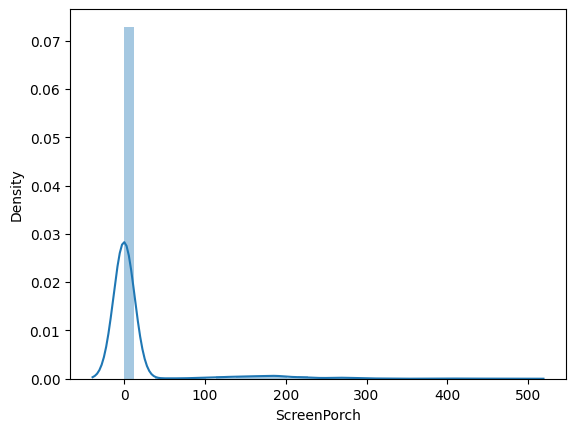

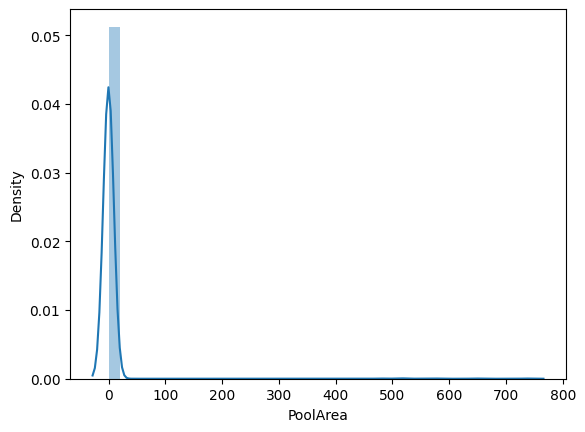

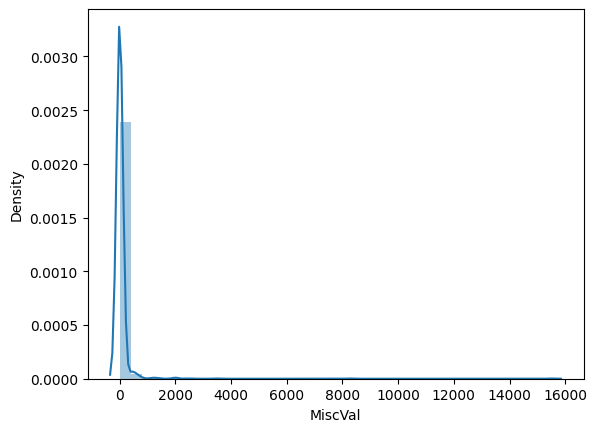

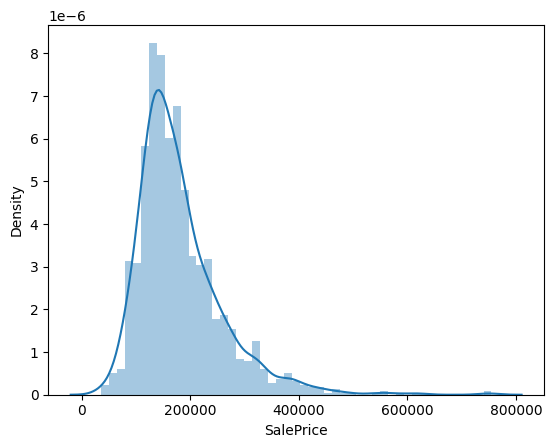

In [10]:
# Perform Exploratory Data Analysis loop all numerical columns create plots
for column in house.select_dtypes(include=['int64', 'float64']).columns:
    sns.distplot(house[column])
    plt.show()

In [11]:
# Remove unwanted numerical columns
house = house.drop([ 'MiscVal', 'PoolArea'], axis=1)


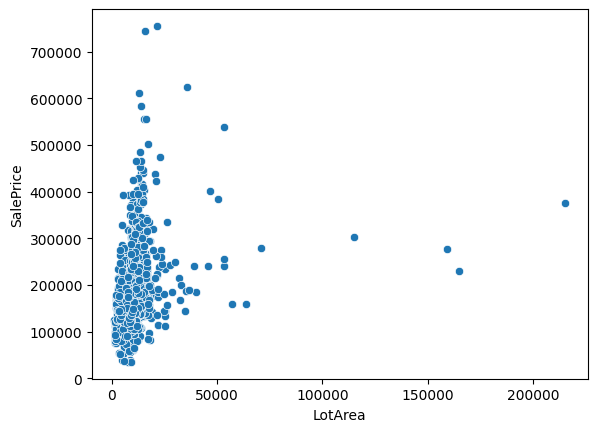

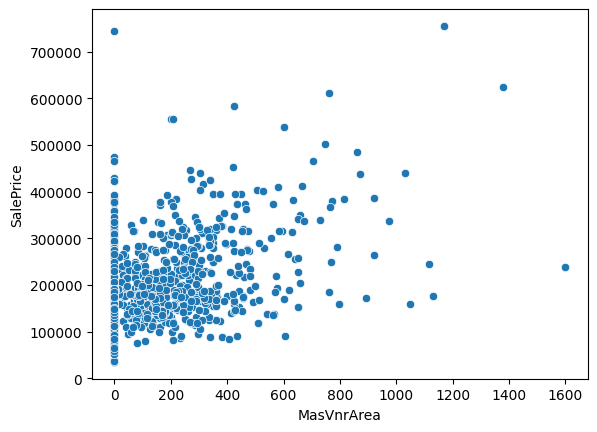

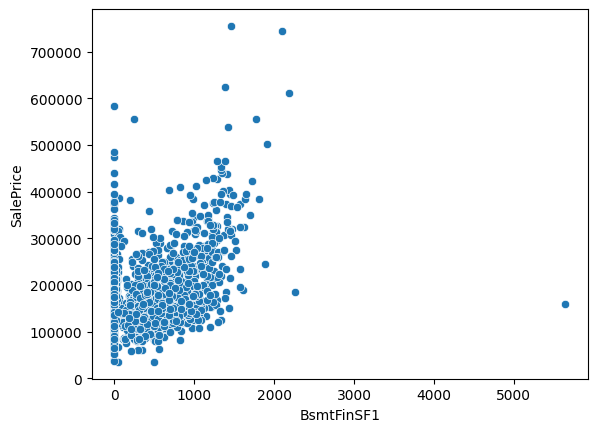

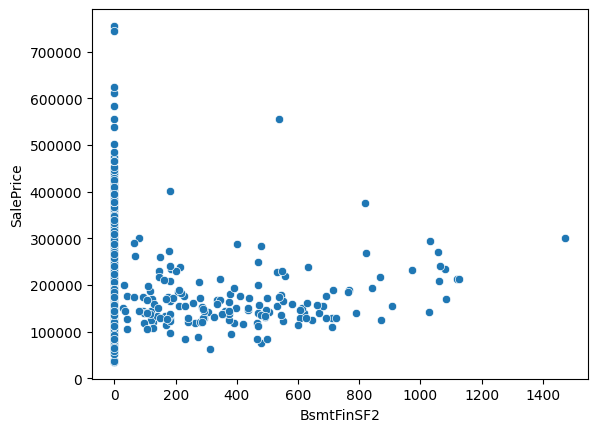

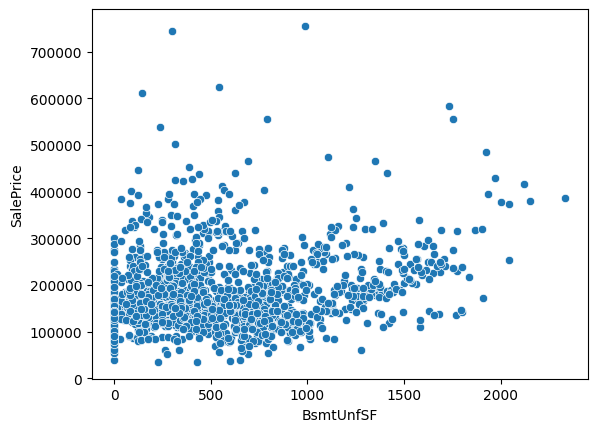

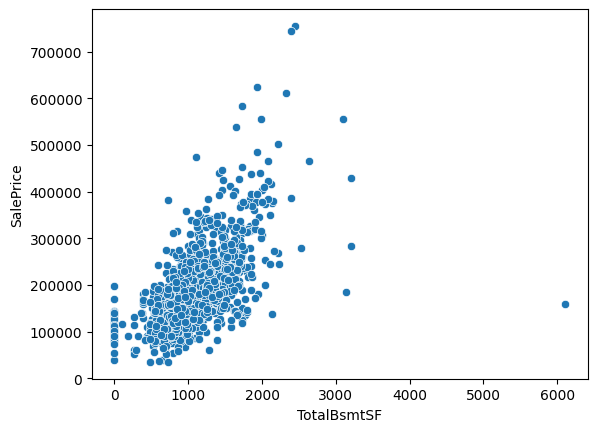

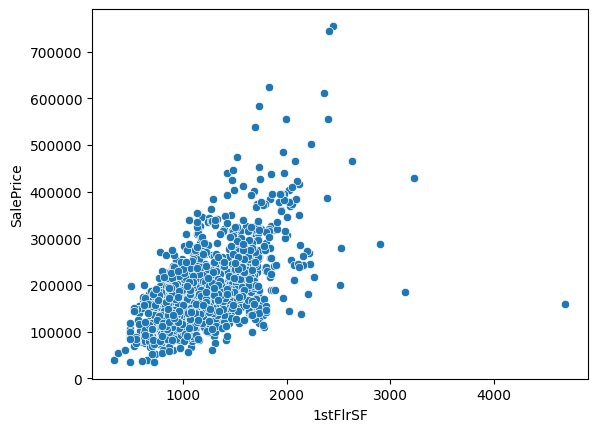

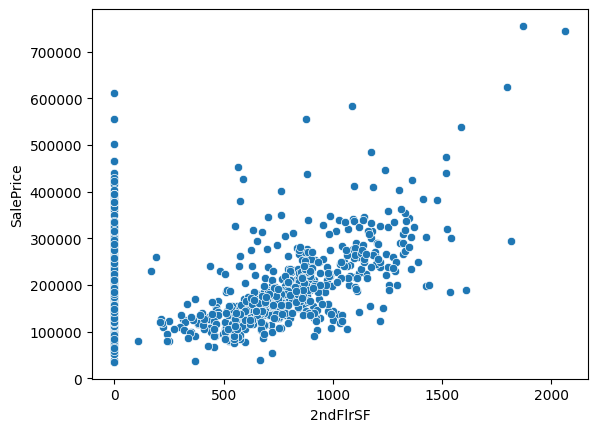

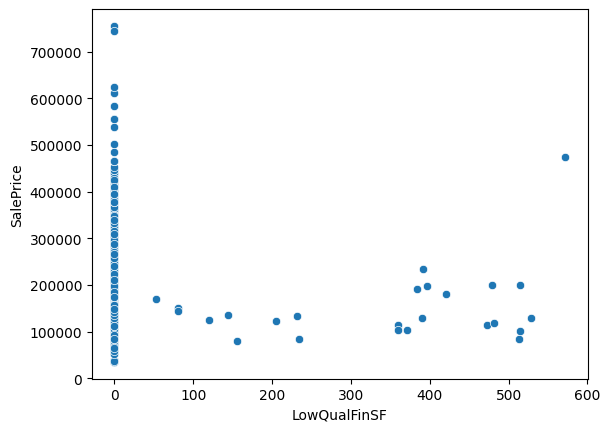

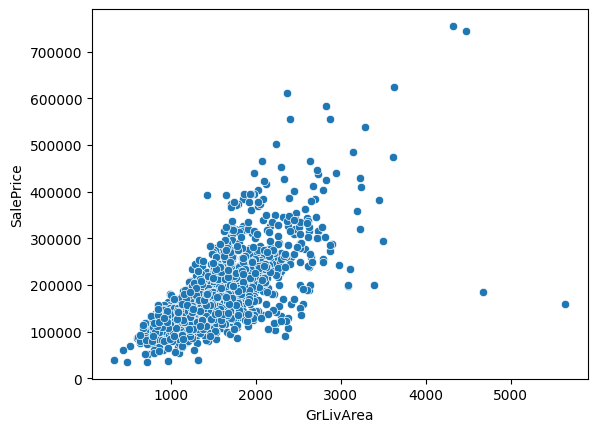

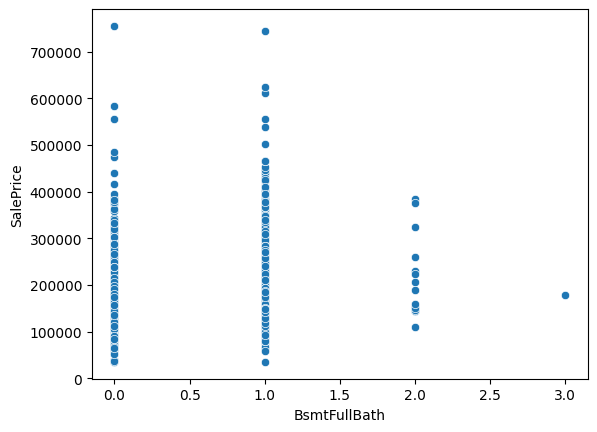

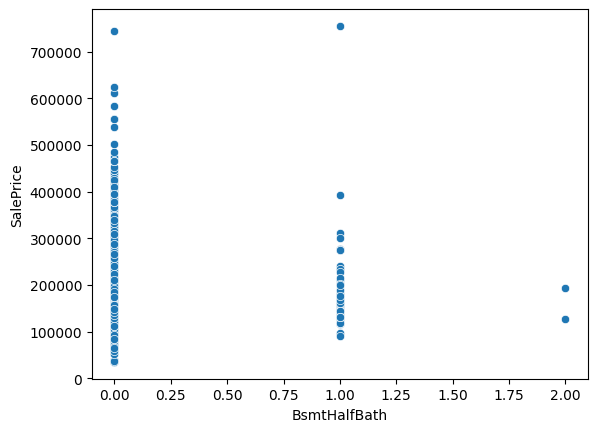

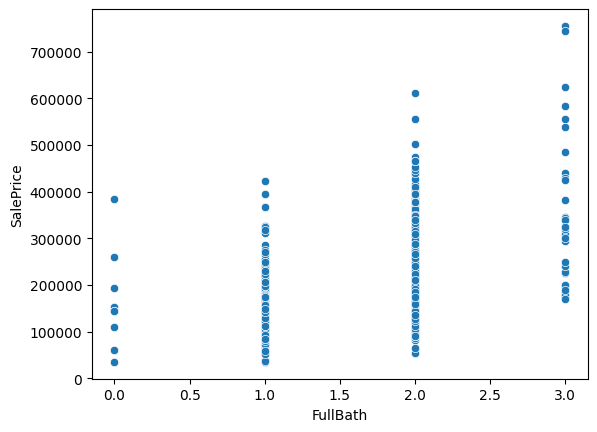

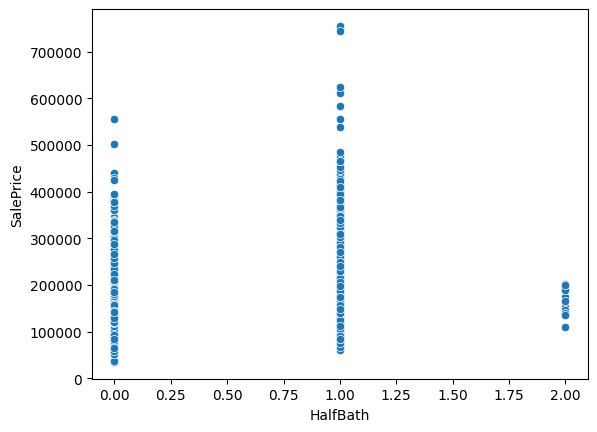

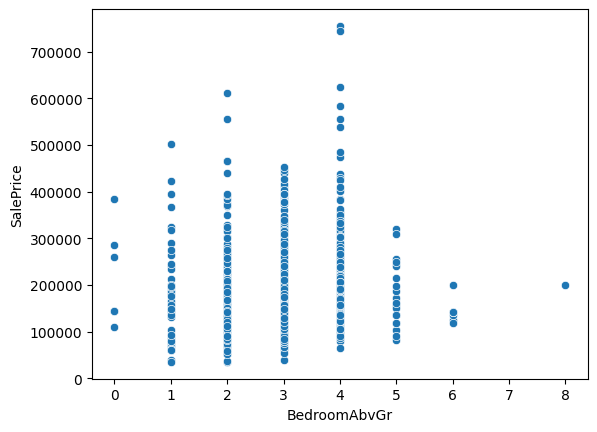

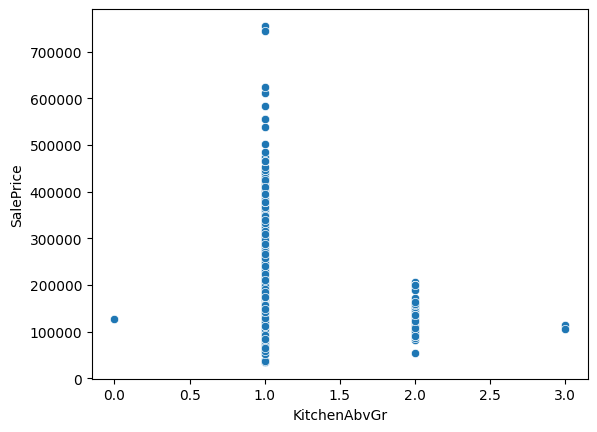

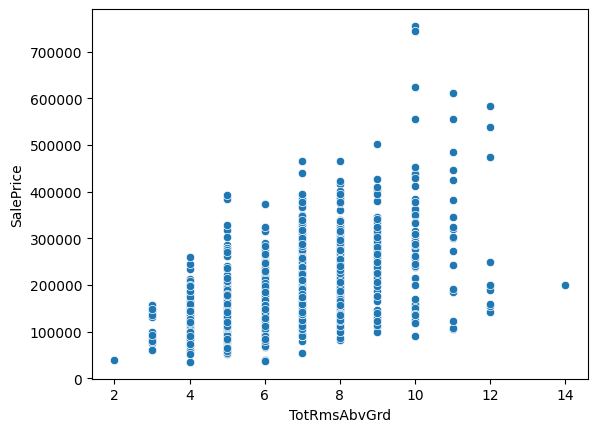

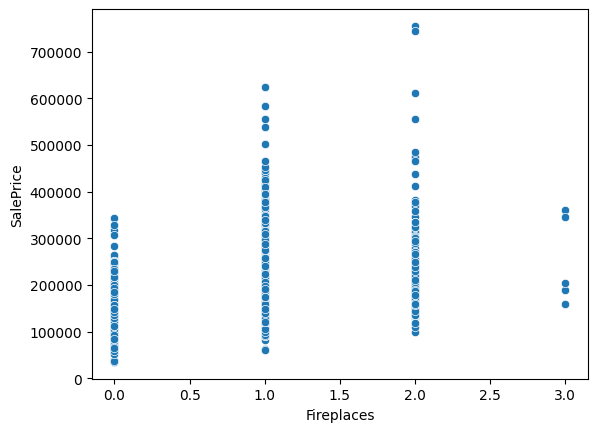

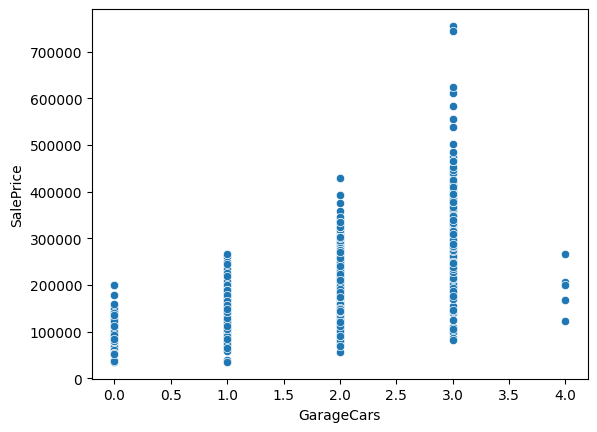

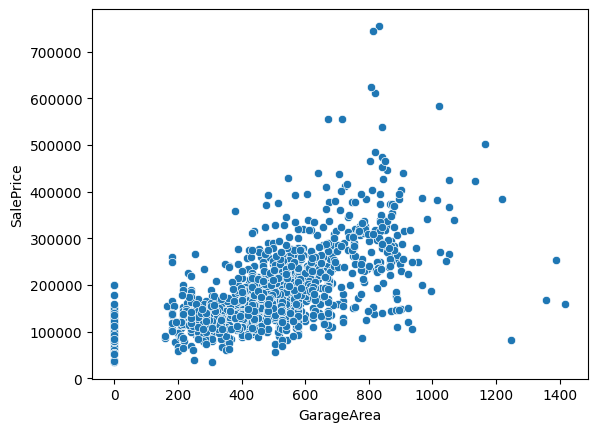

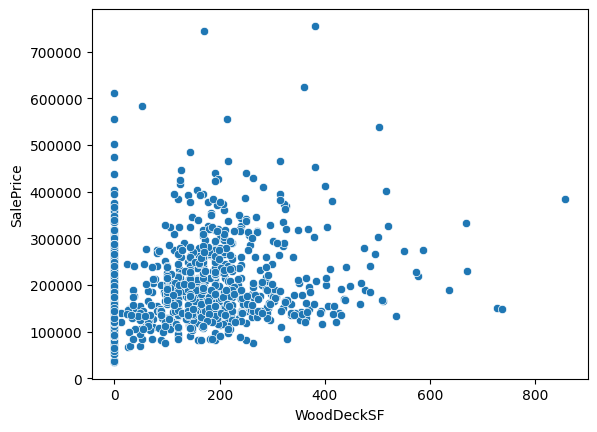

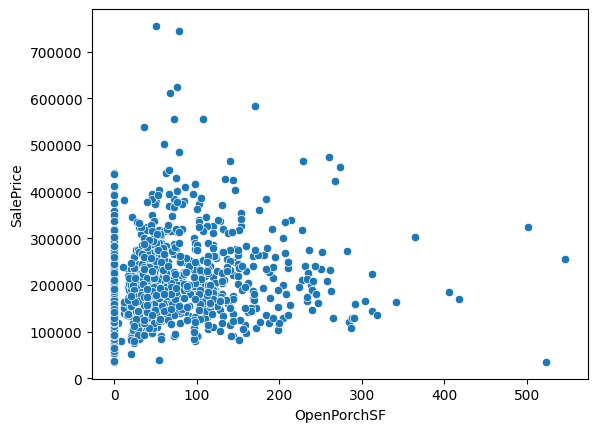

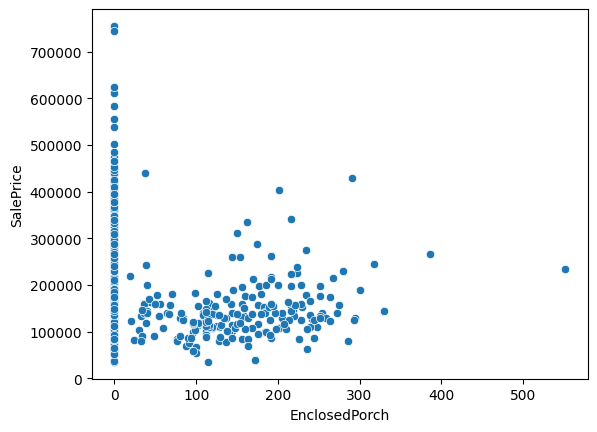

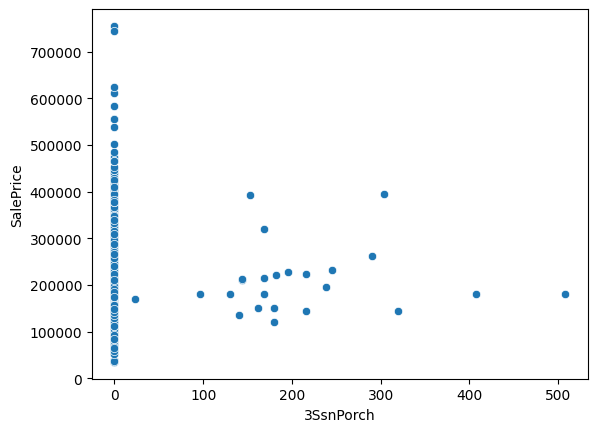

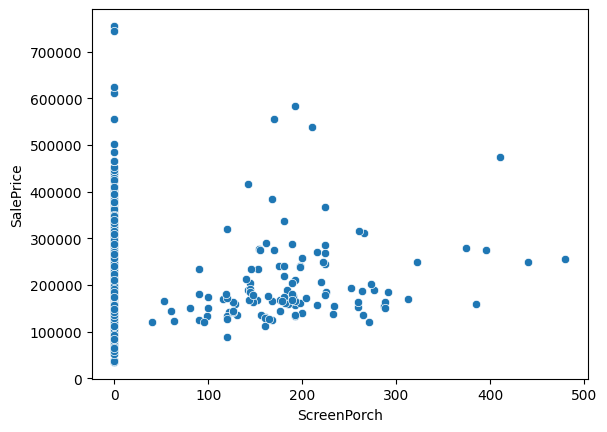

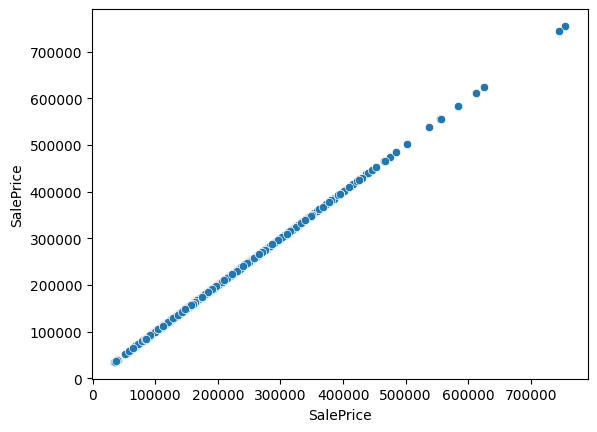

In [12]:
# Perform EDA with respect to Sales Price on all numerical columns
for column in house.select_dtypes(include=['int64', 'float64']).columns:
    sns.scatterplot(x=column, y='SalePrice', data=house)
    plt.show()





In [13]:
# combine all bathrooms
house['TotalBath'] = house['BsmtFullBath'] + house['BsmtHalfBath'] + house['FullBath'] + house['HalfBath']  
house = house.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)

# combine all porch
house['TotalPorch'] = house['OpenPorchSF'] + house['EnclosedPorch'] + house['ScreenPorch'] + house['WoodDeckSF'] + house['3SsnPorch']
house = house.drop(['OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF','3SsnPorch'], axis=1)

# combine all square footage
house['TotalhouseSF'] = house['TotalBsmtSF'] + house['1stFlrSF'] + house['2ndFlrSF'] + house['GrLivArea'] - house['LowQualFinSF'] - house['BsmtUnfSF']
house = house.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'LowQualFinSF', 'BsmtUnfSF','BsmtQual','KitchenQual','KitchenAbvGr'], axis=1)

In [14]:
# check for outliers
house.describe(percentiles = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).transpose()

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
LotArea,1460.0,10516.828082,9981.264932,1300.0,1680.00,3311.7,5000.0,7553.5,9478.5,11601.50,14381.7,17401.15,37567.64,215245.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,0.0,0.0,0.0,164.25,335.0,456.00,791.28,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,0.0,0.0,0.0,383.5,712.25,1065.5,1274.00,1572.41,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.0,0.0,0.0,0.00,117.2,396.20,830.38,1474.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,1.00,2.0,2.0,2.0,3.0,3.00,4.0,4.00,5.00,8.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,3.00,4.0,5.0,5.0,6.0,7.00,9.0,10.00,11.00,14.0
Fireplaces,1460.0,0.613014,0.644666,0.0,0.00,0.0,0.0,0.0,1.0,1.00,1.0,2.00,2.00,3.0
GarageCars,1460.0,1.767123,0.747315,0.0,0.00,0.0,1.0,1.0,2.0,2.00,3.0,3.00,3.00,4.0
GarageArea,1460.0,472.980137,213.804841,0.0,0.00,0.0,240.0,334.5,480.0,576.00,757.1,850.10,1002.79,1418.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,61815.97,88000.0,106475.0,129975.0,163000.0,214000.00,278000.0,326100.00,442567.01,755000.0


In [15]:
# convert categorical columns to numerical
house = pd.get_dummies(house, drop_first=True,dtype=int)
house.head()



,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,SalePrice,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,196.0,706,0,3,8,0,2,548,208500,...,0,0,0,0,1,0,0,0,1,0
1,9600,0.0,978,0,3,6,1,2,460,181500,...,0,0,0,0,1,0,0,0,1,0
2,11250,162.0,486,0,3,6,1,2,608,223500,...,0,0,0,0,1,0,0,0,1,0
3,9550,0.0,216,0,3,7,1,3,642,140000,...,0,0,0,0,1,0,0,0,0,0
4,14260,350.0,655,0,4,9,1,3,836,250000,...,0,0,0,0,1,0,0,0,1,0


In [16]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 246 entries, LotArea to SaleCondition_Partial
dtypes: float64(1), int32(233), int64(12)
memory usage: 1.4 MB


In [17]:
#correlation with target variable
house.corr()['SalePrice'].sort_values(ascending=False)



SalePrice              1.000000
TotalhouseSF           0.748858
GarageCars             0.640409
GarageArea             0.623431
TotalBath              0.613005
                         ...   
OverallQual_Average   -0.364740
MasVnrType_No         -0.367456
GarageFinish_Unf      -0.410608
FireplaceQu_No        -0.471908
ExterQual_TA          -0.589044
Name: SalePrice, Length: 246, dtype: float64

In [18]:
#Remove categorical columns from the dataset
categorical_columns = house.select_dtypes(include=['object']).columns

# Drop categorical columns
house = house.drop(categorical_columns, axis=1)




In [19]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 246 entries, LotArea to SaleCondition_Partial
dtypes: float64(1), int32(233), int64(12)
memory usage: 1.4 MB


In [20]:
# split the data into features and target
X = house.drop('SalePrice', axis=1)
y = house['SalePrice']


In [21]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=100)


In [22]:
X_train.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,TotalBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,5604,0.0,468,0,2,5,0,0,0,2,...,0,0,0,0,1,0,0,0,1,0
318,9900,256.0,987,0,4,9,1,3,656,4,...,0,0,0,0,1,0,0,0,1,0
239,8741,0.0,94,0,3,7,1,1,220,2,...,0,0,0,0,1,0,0,0,1,0
986,5310,0.0,0,0,2,5,0,1,255,1,...,0,0,0,0,1,0,0,0,1,0
1416,11340,0.0,0,0,4,11,0,2,560,2,...,0,0,0,0,1,0,0,0,1,0


In [23]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


# Ridge Regression
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

# Lasso Regression
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

# Model Evaluation
y_pred_ridge = ridge_regressor.predict(X_test)
y_pred_lasso = lasso_regressor.predict(X_test)

print("Ridge RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Lasso RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

print("Ridge Train Score: ", r2_score(y_train, ridge_regressor.predict(X_train)))
print("Ridge Test Score: ", r2_score(y_test, ridge_regressor.predict(X_test)))


print("Lasso Train Score: ", r2_score(y_train, lasso_regressor.predict(X_train)))
print("Lasso Test Score: ", r2_score(y_test, lasso_regressor.predict(X_test)))

Ridge RMSE:  29492.71591078475
Lasso RMSE:  29725.20882996976
Ridge Train Score:  0.8880541343839028
Ridge Test Score:  0.8648385446533867
Lasso Train Score:  0.8937179652163735
Lasso Test Score:  0.862699172992477


In [24]:
#Best alpha value for Ridge and Lasso
print("Ridge Best Alpha: ", ridge_regressor.best_params_)
print("Lasso Best Alpha: ", lasso_regressor.best_params_)

Ridge Best Alpha:  {'alpha': 5}
Lasso Best Alpha:  {'alpha': 20}


In [25]:
# Lasso Regression Coefficients
lasso = Lasso(alpha=20)
lasso.fit(X_train, y_train)
lasso.coef_
lasso.coef_.shape
X_train.columns
lasso_coefficient = pd.DataFrame()
lasso_coefficient["Columns"] = X_train.columns
lasso_coefficient['Coefficient'] = pd.Series(lasso.coef_)
lasso_coefficient = lasso_coefficient.sort_values(by='Coefficient')
lasso_coefficient

,Columns,Coefficient
115,Exterior1st_ImStucc,-33171.551513
50,Neighborhood_Edwards,-18172.540274
186,FireplaceQu_Po,-16245.286872
33,LotShape_IR3,-16137.120278
17,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...,-15899.907892
...,...,...
94,OverallQual_Very Good,34561.548335
59,Neighborhood_NridgHt,38092.409557
58,Neighborhood_NoRidge,44293.856193
89,OverallQual_Excellent,88550.222711


In [30]:
lasso_coefficient.sort_values(by='Coefficient', ascending=False).head(10)


,Columns,Coefficient
93,OverallQual_Very Excellent,103930.859339
89,OverallQual_Excellent,88550.222711
58,Neighborhood_NoRidge,44293.856193
59,Neighborhood_NridgHt,38092.409557
94,OverallQual_Very Good,34561.548335
49,Neighborhood_Crawfor,30255.223501
64,Neighborhood_Somerst,28282.966262
129,Exterior2nd_ImStucc,27696.210129
65,Neighborhood_StoneBr,24698.634144
234,SaleType_ConLD,22811.902779


In [31]:
# Lasso Regression Coefficients double alpha
lasso = Lasso(alpha=40)
lasso.fit(X_train, y_train)
lasso.coef_
lasso.coef_.shape
X_train.columns
lasso_coefficient = pd.DataFrame()
lasso_coefficient["Columns"] = X_train.columns
lasso_coefficient['Coefficient'] = pd.Series(lasso.coef_)
lasso_coefficient = lasso_coefficient.sort_values(by='Coefficient')
lasso_coefficient

,Columns,Coefficient
50,Neighborhood_Edwards,-17922.214260
78,BldgType_Twnhs,-14880.726234
33,LotShape_IR3,-14377.834568
17,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...,-14133.433154
83,HouseStyle_2.5Unf,-13549.607435
...,...,...
94,OverallQual_Very Good,34722.359022
59,Neighborhood_NridgHt,36493.279486
58,Neighborhood_NoRidge,42330.758725
89,OverallQual_Excellent,89387.232186


In [33]:
# Drop First 5 important features
X_train = X_train.drop(['TotalhouseSF', 'TotalBath', 'OverallQual_Very Excellent', 'OverallQual_Excellent', 'OverallQual_Very Good'], axis=1)
X_test = X_test.drop(['TotalhouseSF', 'TotalBath', 'OverallQual_Very Excellent', 'OverallQual_Excellent', 'OverallQual_Very Good'], axis=1)

# Lasso Regression
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

# Model Evaluation
y_pred_lasso = lasso_regressor.predict(X_test)

print("Lasso RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

print("Lasso Train Score: ", r2_score(y_train, lasso_regressor.predict(X_train)))

print("Lasso Test Score: ", r2_score(y_test, lasso_regressor.predict(X_test)))



Lasso RMSE:  31617.510585826283
Lasso Train Score:  0.8563470259835007
Lasso Test Score:  0.844661656476895


In [36]:
# Lasso Regression Coefficients
lasso = Lasso(alpha=20)
lasso.fit(X_train, y_train)
lasso.coef_
lasso.coef_.shape
X_train.columns
lasso_coefficient = pd.DataFrame()
lasso_coefficient["Columns"] = X_train.columns
lasso_coefficient['Coefficient'] = pd.Series(lasso.coef_)
lasso_coefficient = lasso_coefficient.sort_values(by='Coefficient')
lasso_coefficient.sort_values(by='Coefficient', ascending=False).head(10)

,Columns,Coefficient
56,Neighborhood_NoRidge,69382.736218
63,Neighborhood_StoneBr,52703.075286
124,Exterior2nd_ImStucc,47069.174391
57,Neighborhood_NridgHt,46201.259433
227,SaleType_CWD,32316.837210
62,Neighborhood_Somerst,30642.338249
229,SaleType_ConLD,29395.576689
26,MSZoning_RL,26053.753143
47,Neighborhood_Crawfor,25705.662216
25,MSZoning_RH,24233.855505
